In [103]:
import pandas as pd
import numpy as np
import datetime as dt
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt

In [104]:
SR_factor = pd.read_csv("FactorModel_Predict.csv").set_index("observation_date")
SR_factor.index = pd.to_datetime(SR_factor.index)
SR_factor.index = [x + relativedelta(days=-1) for x in SR_factor.index]

SR_GLRM = pd.read_csv("GLRM_Predict.csv").set_index("observation_date")
SR_GLRM.index = pd.to_datetime(SR_GLRM.index)
SR_GLRM.index = [x + relativedelta(days=-1) for x in SR_GLRM.index]

SR_Krip = pd.read_csv("SSR_FullCalibration2 (1).csv").set_index("dates")
SR_Krip.index = pd.to_datetime(SR_Krip.index)
SR_Krip = SR_Krip.resample("M").first()
SR_Krip = SR_Krip*100

SR_WX = pd.read_excel("results\\trial20201008split_date=202010SR.xlsx")
SR_WX.set_index("Unnamed: 0", inplace=True)
SR_WX.index.name = "date"
SR_WX.rename({"Unnamed: 1":"Free"}, axis=1, inplace=True)
SR_WX.index = [str(x) for x in SR_WX.index]
SR_WX.index = [dt.datetime.strptime(x,"%Y%m") for x in SR_WX.index]
SR_WX.index = [dt.datetime(x.year, x.month, 1) + relativedelta(months=1, days=-1) for x in SR_WX.index]
SR_WX = SR_WX[[0,-0.1]]

all_SR = pd.concat([SR_factor, SR_GLRM, SR_Krip, SR_WX], axis=1)
all_SR = all_SR.rename({0:"Wu & Xia (0)", -0.1:"Wu & Xia (-0.1)", "SSR":"Krippner (0)", "interest_only":"factor_interestonly", "monetary_factors":"factor_monetary"},axis=1)
all_SR = all_SR[all_SR.index>=dt.datetime(2008,1,1)]

In comparison with term structure based model, 

    1.factor model and GLRM model produced results that rarely go below -1%.
    2.GLRM model produced increasing trend since late 2011
    
    
In comparison with Krippner's model, Wu & Xia model
    
    1. produced lower results, although it is possible this might be related to selected training period/maturities, rather than difference in model
    2. results are more smooth, possibly due to lower data frequency (monthly vs daily).
    3.The "rebound and fall" during 2012 - 2014 is much less pronounced. While this period seemed more of a minor fluctuation for Wu & Xia, Krippner's shadow rate bounced back to over -1%. Krippner's result with lower bound 0% are somewhat similar to Wu & Xia with lower bound -0.1%. Personally I don't like this, as there weren't any major contractionary policies during 2012-2013, and as we increase lower bound to 0.1% this phenomenon goes away.
    4. Correlation between the two is 0.944

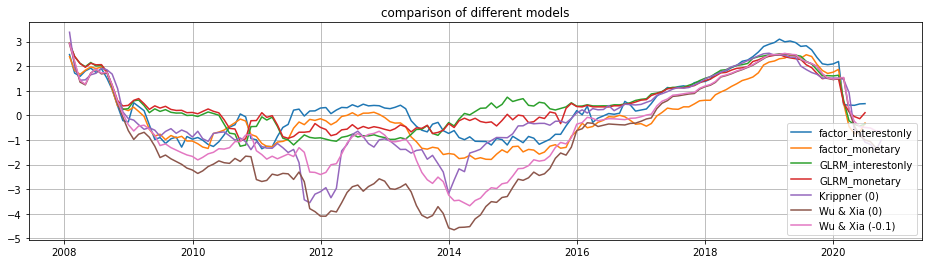

In [105]:
plt.figure(figsize=(16,4))
plt.title("comparison of different models")
plt.grid("on")
plt.plot(all_SR)
plt.legend(all_SR.columns)

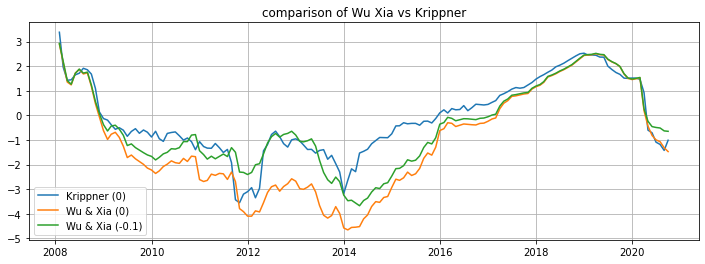

In [107]:
plt.figure(figsize=(12,4))
plt.title("comparison of Wu Xia vs Krippner")
plt.grid("on")
plt.plot(all_SR[all_SR.columns[-3:]])
plt.legend(all_SR[all_SR.columns[-3:]].columns)

In [100]:
all_SR[all_SR.columns[-3:]].corr()

Krippner  Wu & Xia (0)  Wu & Xia (-0.1)
Krippner         1.000000      0.944050         0.906799
Wu & Xia (0)     0.944050      1.000000         0.971378
Wu & Xia (-0.1)  0.906799      0.971378         1.000000